In [76]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# 1. Loading Data

## 1.1 Petroleum price

In [311]:
oil = pd.read_csv('crude-oil.csv')
# ngv = pd.read_csv('ngv.csv')
# eth = pd.read_csv('ethanol.csv')
# gas = pd.read_csv('gasoline.csv')
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 7 columns):
Date        2587 non-null object
Price       2587 non-null float64
Open        2587 non-null float64
High        2587 non-null float64
Low         2587 non-null float64
Vol.        2587 non-null object
Change %    2587 non-null object
dtypes: float64(4), object(3)
memory usage: 141.6+ KB


In [312]:
oil['Date'] = oil['Date'].astype('datetime64')
oil=oil.rename(columns = {'Date':'date'})
oil = oil.sort_values(by='date',ascending=True)
oil = oil.reset_index(drop=True)
oil.head()

,date,Price,Open,High,Low,Vol.,Change %
0,2009-05-29,66.31,64.77,66.64,64.68,261.37K,1.89%
1,2009-06-01,68.58,66.48,68.68,66.23,234.08K,3.42%
2,2009-06-02,68.55,68.04,69.05,67.50,266.86K,-0.04%
3,2009-06-03,66.12,68.25,68.95,64.95,322.37K,-3.54%
4,2009-06-04,68.81,66.09,69.60,65.92,304.67K,4.07%


## 1.2 Share stock price
Last 10 year stock price for various company from finance.yahoo.com

In [313]:
PTT =   pd.read_csv('PTT.BK.ori.csv')
stock_list = [
    'BCP.BK', 
    'ESSO.BK',
    'PTTEP.BK',
    'PTTGC.BK',
    'IRPC.BK',
    'PTT.BK',
    'TOP.BK',
    'CVX']

### Let's preview the PTT shares price

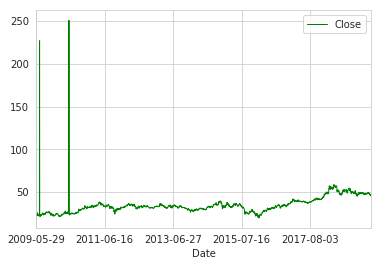

In [314]:
PTT[['Date','Close']].set_index('Date').plot(color="green", linewidth=1.0)

Something went wrong, we need to clean up the data first

In [315]:
PTT['Close'].sort_values(ascending=False)[0:5]

239     251.000000
240     251.000000
25      227.000000
2174     58.799999
2173     58.000000
Name: Close, dtype: float64

It looks like their are wrong floating point

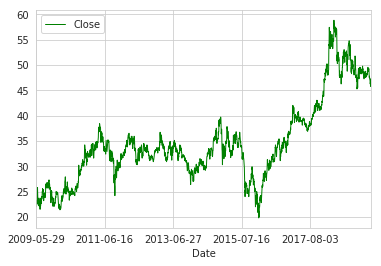

In [316]:
PTT.loc[PTT['Close'] > 100,'Close'] = PTT.loc[PTT['Close'] > 100,'Close'] / 10
PTT[['Date','Close']].set_index('Date').plot(color="green", linewidth=1.0)

### 1.3 Let's merge both data set together

In [340]:
all_data = pd.DataFrame()
stock_list = [
    'PTT.BK',
    'PTTEP.BK',
    'PTTGC.BK',
    'TOP.BK',
    'CVX',
    'BCP.BK', 
    'ESSO.BK',
    'IRPC.BK']
for comp in stock_list:
    stock = pd.read_csv(comp+'.csv')
    stock['Date'] = stock['Date'].astype('datetime64')
    stock = stock[['Date','Close']]
    stock.columns=["date","share_price"]
    test=pd.DataFrame(oil) # VLOOKUP equivalent in Python to merge 2 sets of data
    output=stock.merge(test,on="date",how="left")
    stock['oil_price'] = output['Price']   
    stock['share_price'] = pd.to_numeric(stock['share_price'], errors='coerce').interpolate(method ='linear').dropna(0)
    stock['oil_price']   = pd.to_numeric(stock['oil_price'], errors='coerce').interpolate(method ='linear').dropna(0)
    stock['year'] = pd.to_datetime(stock["date"]).dt.year
    
    scaler=MinMaxScaler()
    stock['share_price_scaled'] = scaler.fit_transform(stock["share_price"].to_frame())
    stock['name'] = comp
    all_data = all_data.append(stock)
all_data.set_index('date')
all_data[all_data['name'] == 'PTT.BK'].head()

,date,share_price,oil_price,year,share_price_scaled,name
0,2009-05-29,22.000000,66.31,2009,0.056410,PTT.BK
1,2009-06-01,23.200001,68.58,2009,0.087180,PTT.BK
2,2009-06-02,22.700001,68.55,2009,0.074359,PTT.BK
3,2009-06-03,22.600000,66.12,2009,0.071795,PTT.BK
4,2009-06-04,22.900000,68.81,2009,0.079487,PTT.BK


# 2. Data Analysis

2.1.- Simple line plot oil price

2.2.- Pairplot on PTT share price from years 2009 to 2019 using a color gradient for different years

2.3.- Pairplot on PTT share price using last 4 years

2.4.- Violin plot of the oil price

2.5.- Violin plot of the share price of several oil&gas companies

2.6.- Jointplot comparison of PTT and Chevron

2.7.- Plot of oil price vs share price of different companies using different templates

### 2.1 Simple line plot oil price

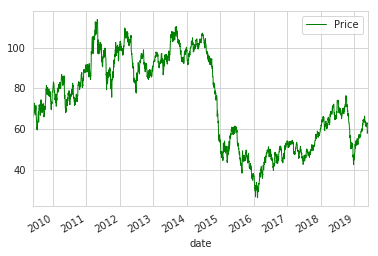

In [341]:
oil[['date','Price']].set_index('date').plot(color="green", linewidth=1.0)

### 2.1 Pairplot on PTT share price from years 2009 to 2019 using a color gradient for different years



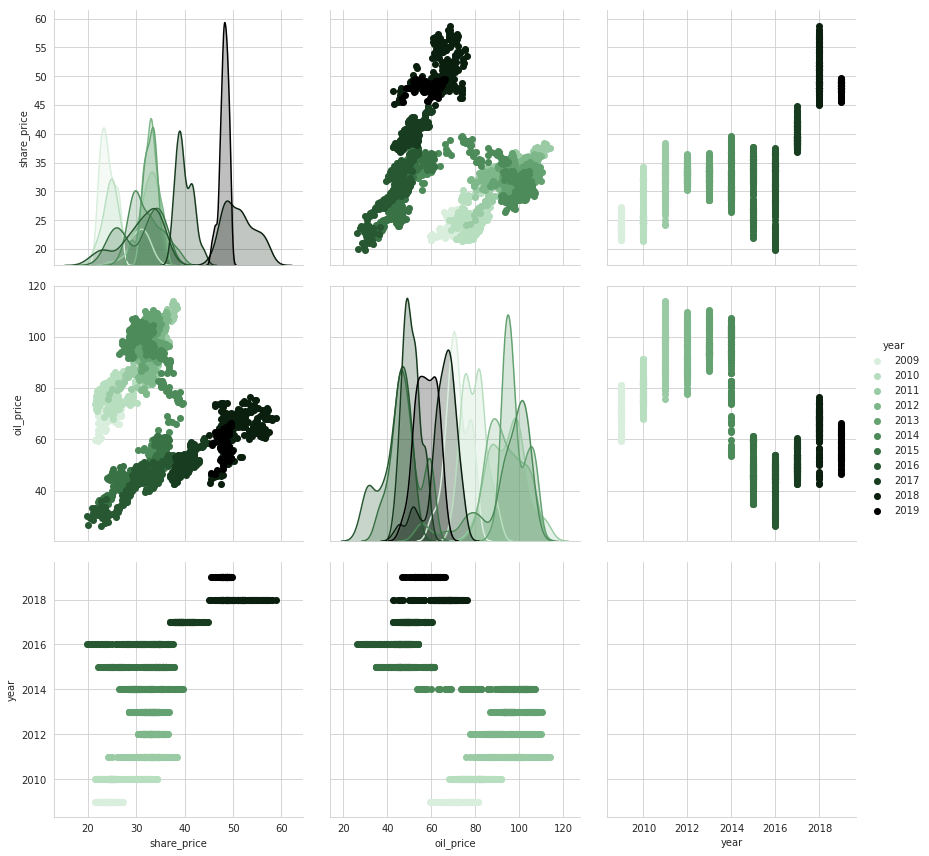

In [342]:
stock_name = 'PTT.BK'
year_count = len(all_data['year'].unique())
palette=sns.cubehelix_palette(year_count, start=2, rot=0, dark=0, light=0.90, reverse=False)
sns.pairplot(all_data[all_data['name']== stock_name].drop(["share_price_scaled"],axis=1),
             hue="year",palette=palette,size=4,markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0))

### 2.1 Pairplot on PTT share price using last five years

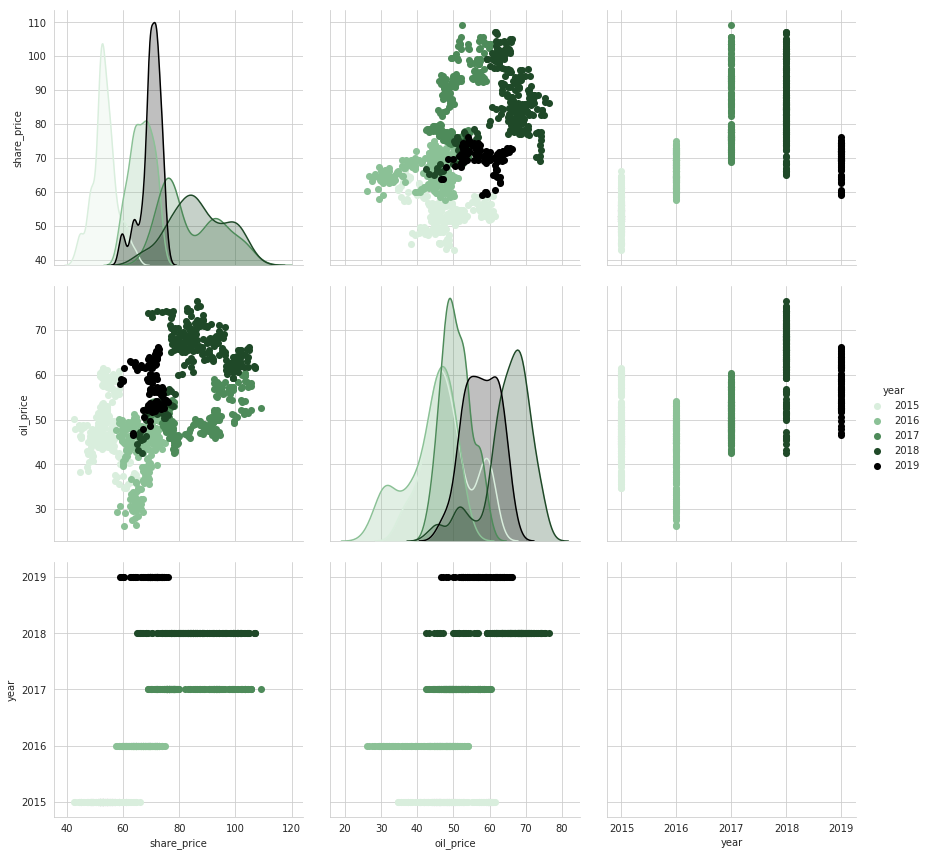

In [343]:
stock_name = 'TOP.BK'
all_data15 =all_data[all_data["year"]>2014]
year_count = len(all_data15['year'].unique())
palette=sns.cubehelix_palette(year_count, start=2, rot=0, dark=0, light=0.90, reverse=False)
sns.pairplot(all_data15[all_data15['name']== stock_name].drop(["share_price_scaled"],axis=1),
             hue="year",palette=palette,size=4,markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0))

### 2.4.- Violin plot of the oil price

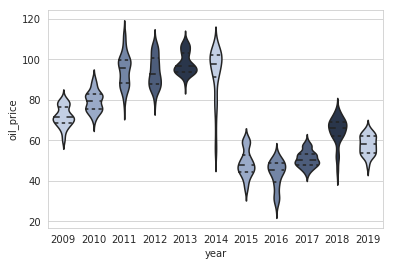

In [344]:
sns.set_style("whitegrid")
palette=sns.cubehelix_palette(5, start=2.8, rot=0, dark=0.2, light=0.8, reverse=False)

sns.violinplot(x="year", y="oil_price", data=all_data[all_data['name']==stock_name] ,
               inner="quart", palette=palette, trim=True)

### 2.5 Violin plot of the share price of several Oil and Gas companies

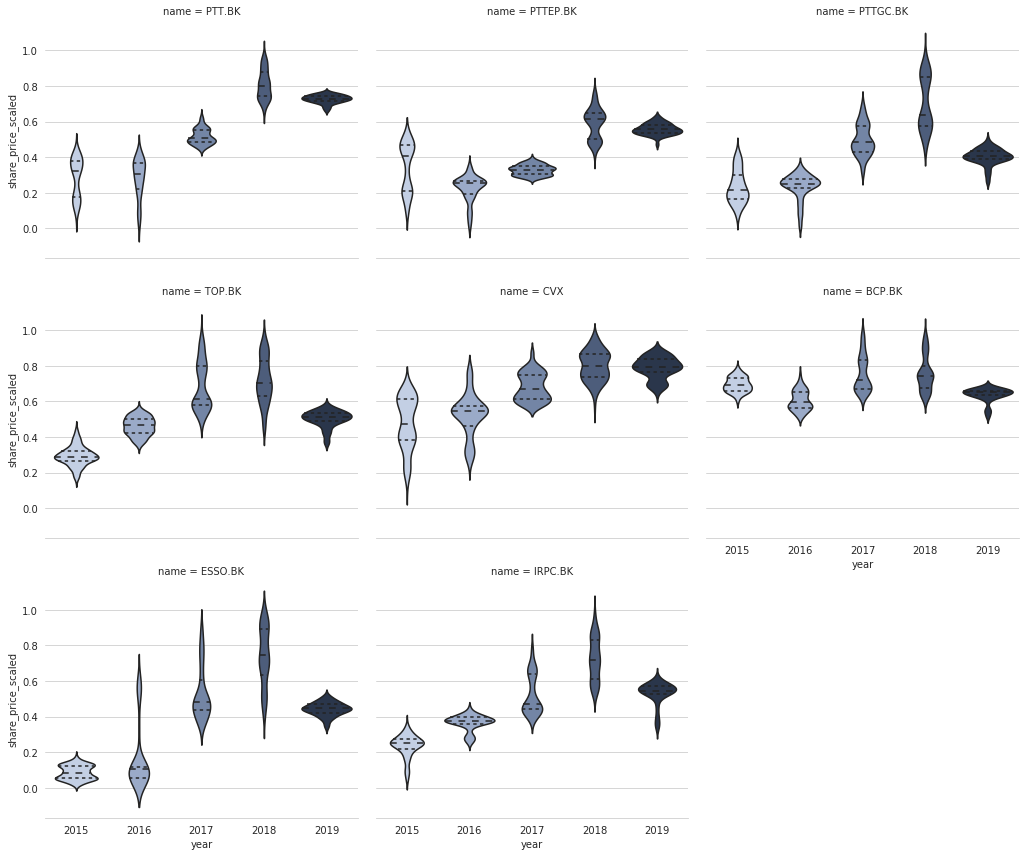

In [345]:
sns.factorplot(x="year", y="share_price_scaled", col='name', col_wrap=3,kind="violin",
               split=True, data=all_data15,inner="quart", palette=palette, trim=True,size=4,aspect=1.2)
sns.despine(left=True)

### 2.6.- Jointplot comparison of PTT and Chevron

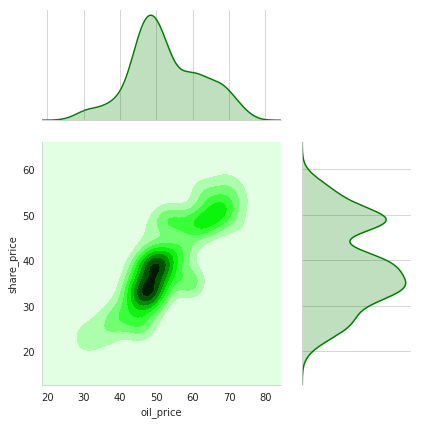

In [349]:
stock_name = 'PTT.BK'
sns.jointplot("oil_price", "share_price",data=all_data15[all_data15['name']==stock_name],kind="kde",
              hue="year",size=6,ratio=2,color="green").plot_joint(sns.kdeplot, zorder=0, n_levels=20)

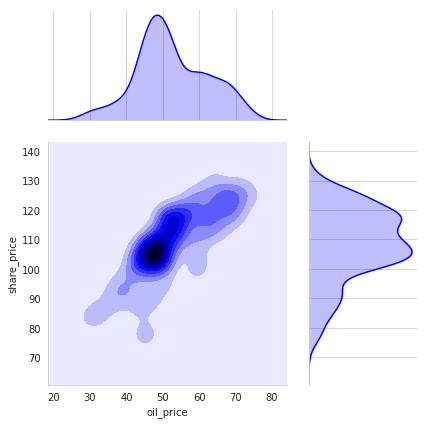

In [350]:
stock_name = 'CVX'
sns.jointplot("oil_price", "share_price",data=all_data15[all_data15['name']==stock_name],kind="kde",
              hue="year",size=6,ratio=2,color="blue").plot_joint(sns.kdeplot, zorder=0, n_levels=20)

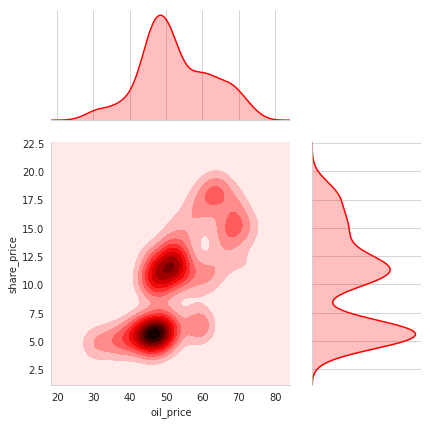

In [351]:
stock_name = 'ESSO.BK'
sns.jointplot("oil_price", "share_price",data=all_data15[all_data15['name']==stock_name],kind="kde",
              hue="year",size=6,ratio=2,color="red").plot_joint(sns.kdeplot, zorder=0, n_levels=20)

### 2.7.- Plot of oil price vs share price of different companies using different templates

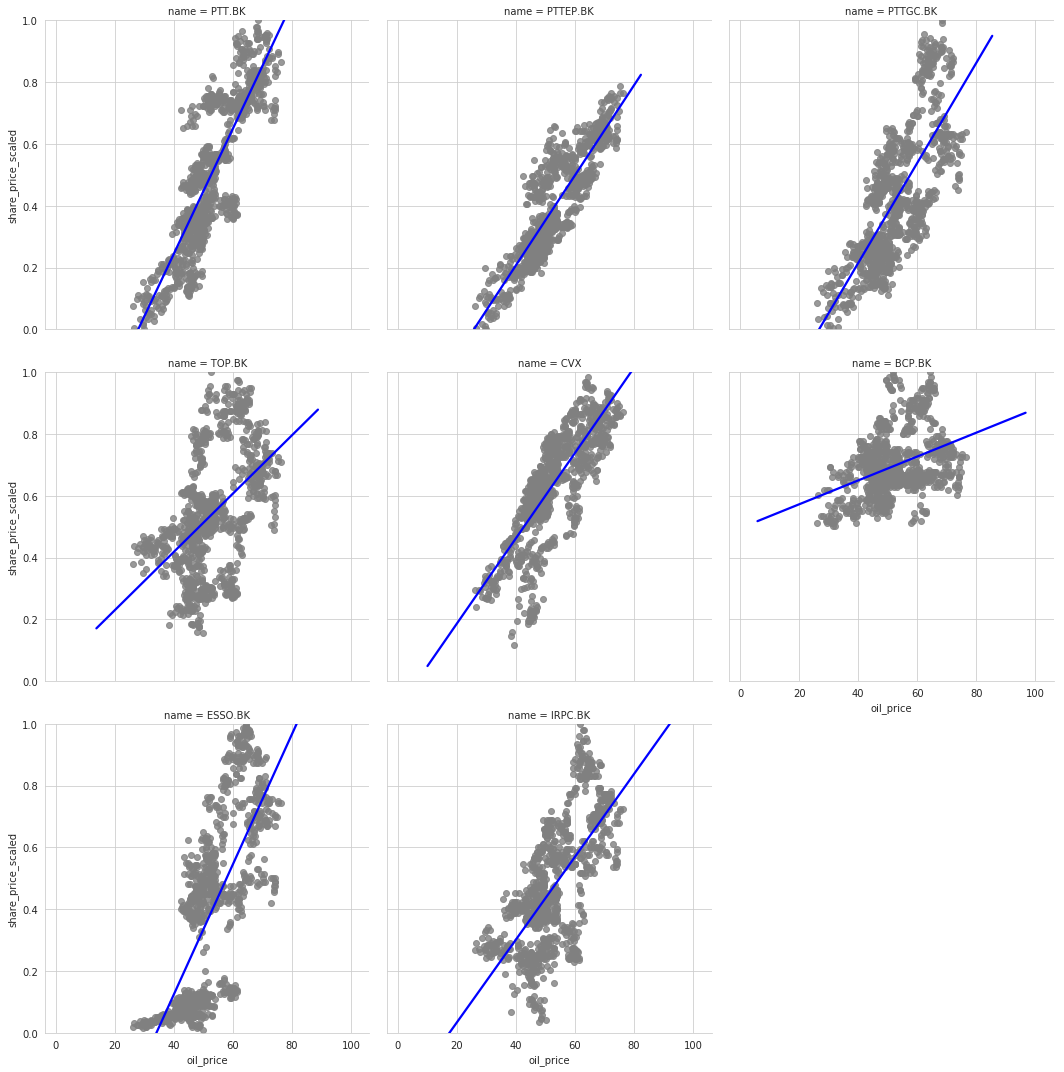

In [380]:
sns.lmplot(x="oil_price", y="share_price_scaled", col="name",ci=None, col_wrap=3, 
           data=all_data15, order=1,line_kws={'color': 'blue'},scatter_kws={'color': 'grey'}).set(ylim=(0, 1))

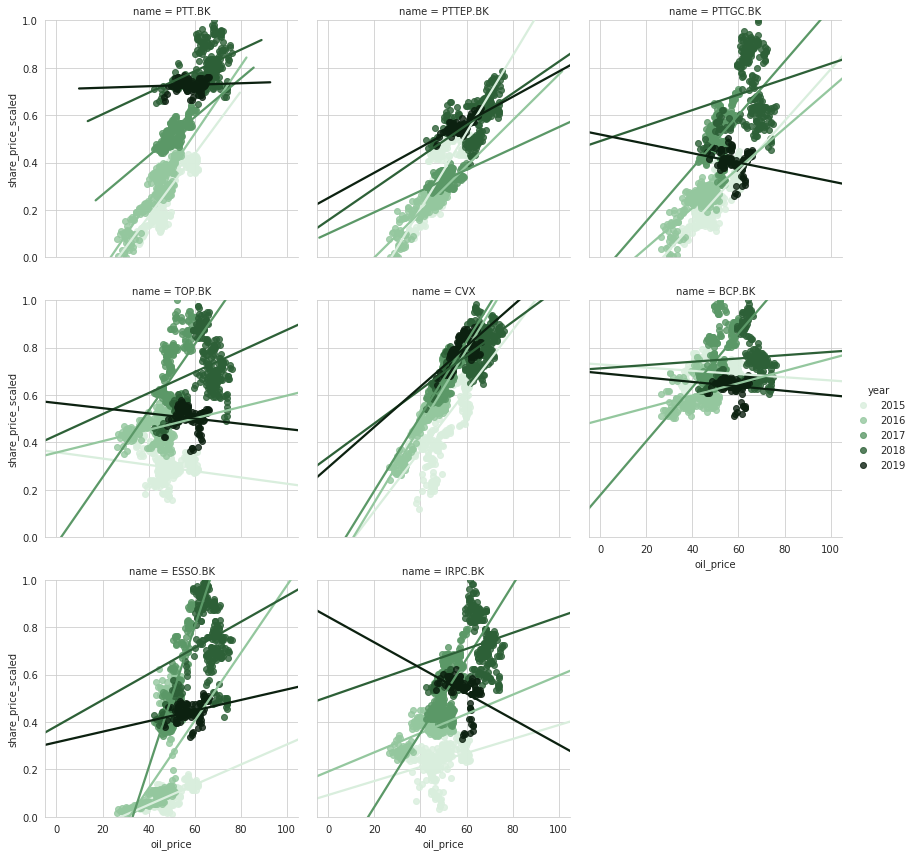

In [381]:
year_count = len(all_data15['year'].unique())
palette=sns.cubehelix_palette(year_count, start=2, rot=0, dark=0.1, light=0.9, reverse=False)
sns.lmplot(x="oil_price", y="share_price_scaled",hue="year", col="name",ci=None, 
           col_wrap=3, data=all_data15, order=1,palette=palette,size=4).set(ylim=(0, 1),xlim=(-5,105))

# 3. Machine Learning and Prediction

3.1.- Cluster analysis on PTT data

3.2.- Linear regression on PTT share price vs oil price

3.3.- Random Forest on PTT share price vs oil price

## 3.1.- Cluster analysis on Shell data

In [397]:
stock_name = 'PTT.BK'

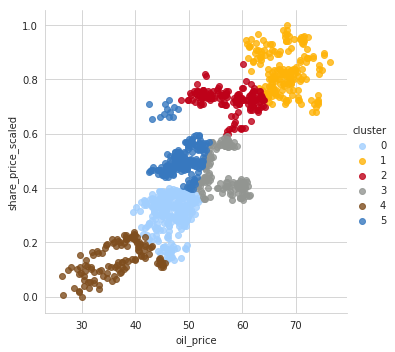

In [398]:
#==============================================================================
# Unsupervised Learning - Cluster analysis on Shell data
#==============================================================================
from sklearn.cluster import KMeans

ptt=pd.DataFrame()
ptt=all_data15[all_data15['name']==stock_name]
n_clusters=6
random_seed=1

# We need to scale also oil price, so clustering is not influenced by the relative size of one axis.
ptt["oil_price_scaled"]=scaler.fit_transform(ptt["oil_price"].to_frame())
ptt["cluster"] = KMeans(n_clusters=n_clusters, random_state=random_seed).fit_predict(ptt[["share_price_scaled","oil_price_scaled"]])

# The 954 most common RGB monitor colors https://xkcd.com/color/rgb/
colors = ["baby blue", "amber", "scarlet", "grey","milk chocolate", "windows blue"]
palette=sns.xkcd_palette(colors)

sns.lmplot(x="oil_price", y="share_price_scaled",ci=None,palette=palette, hue="cluster",fit_reg=0 ,data=ptt)

In [408]:
#==============================================================================
# Supervised learning linear regression
#==============================================================================

from sklearn import linear_model

test_set_start_year = 2018

# 1.- Data preparation
ptt_fortest=pd.DataFrame()
ptt_fortest=all_data15[(all_data15['name']==stock_name) & (all_data15['year']>=test_set_start_year )] # Extract data from years 2018/2019
ptt_fortest=ptt_fortest[["share_price","oil_price"]].reset_index()

# Just using 1 variable for linear regression. To try with more variables use randomforest
# Split the data into training/testing sets
train = ptt_fortest[:-100]
test = ptt_fortest[-100:]

x_train=train["oil_price"].to_frame() #converts the pandas Series to numpy.ndarray
y_train=train['share_price'].to_frame()
x_test=test["oil_price"].to_frame() #converts the pandas Series to numpy.ndarray
y_test=test['share_price'].to_frame()

# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(x_train,y_train)

# The coefficients
print("Coefficients: ",  float(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_train) - y_train) ** 2))

Coefficients:  0.17345660402315147
Mean squared error: 8.65


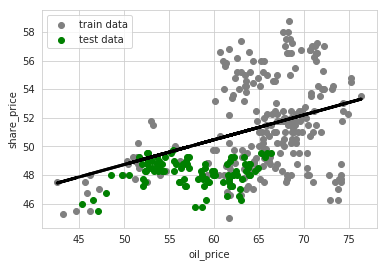

In [409]:
# Plot outputs using matplotlib
plt_train=plt.scatter(x_train, y_train,  color='grey')
plt_test=plt.scatter(x_test, y_test,  color='green')
plt.plot(x_train, regr.predict(x_train), color='black', linewidth=3)
plt.plot(x_test,regr.predict(x_test),  color='black', linewidth=3)
plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train, plt_test),("train data", "test data"))
plt.show()

### 3.3.- Random Forest on PTT share price vs oil price

In [453]:
from sklearn.ensemble import RandomForestRegressor

test_set_start_year = 2018
stock_name = 'PTT.BK'

# 1.- Data preparation
ptt_fortest=pd.DataFrame()
ptt_fortest=all_data15[(all_data15['name']==stock_name) & (all_data15['year']>=test_set_start_year )] # Extract data from years 2018/2019
ptt_fortest=ptt_fortest[["share_price","oil_price"]].reset_index()


comp_to_use = [
#     'PTT.BK',
#     'PTTEP.BK',
#     'PTTGC.BK',
    'TOP.BK',
    'CVX',
    'BCP.BK', 
    'ESSO.BK',
#     'IRPC.BK'
]

# Load share price of other variables
for comp in comp_to_use:
    ptt_fortest[comp]=all_data15[(all_data15['name']==comp)][-373:].reset_index()['share_price']

train = ptt_fortest[:-100]
test = ptt_fortest[-100:]

x_train=train[["oil_price"] + comp_to_use]
y_train=train['share_price']

x_test=test[["oil_price"] + comp_to_use] 
y_test=test['share_price'].to_frame()


# 2.- Create Randomforest object usinig a max depth=5
regressor = RandomForestRegressor(n_estimators=200, max_depth=5 )

# 3.- Train data
clf=regressor.fit(x_train, y_train)

# 4.- Predict!
y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)

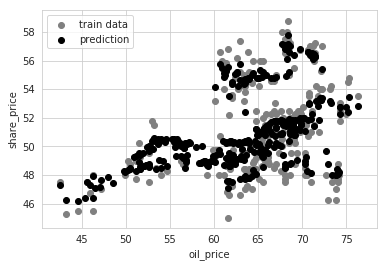

In [454]:
# We are going to have a look at how fitted data looks like:

plt_train=plt.scatter(x_train["oil_price"],y_train,   color='grey')
plt_pred=plt.scatter(ptt_fortest["oil_price"], regressor.predict(ptt_fortest[["oil_price"] + comp_to_use]),  color='black')

plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train,plt_pred),("train data","prediction"))
plt.show()

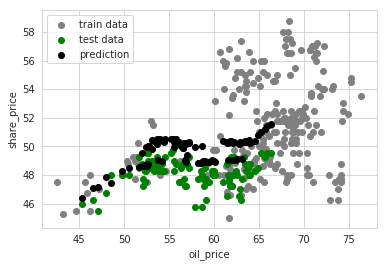

In [455]:
plt_train=plt.scatter(x_train["oil_price"],y_train,   color='grey')
plt_test=plt.scatter(x_test["oil_price"],y_test,   color='green')
plt_pred=plt.scatter(x_test["oil_price"], y_pred,  color='black')

plt.xlabel("oil_price")
plt.ylabel("share_price")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

In [456]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

Mean squared error: 0.64


Feature ranking:
Feature oil_price (0.178558)
Feature TOP.BK (0.111573)
Feature CVX (0.284218)
Feature BCP.BK (0.073275)
Feature ESSO.BK (0.352376)


Text(0, 0.5, 'Importance')

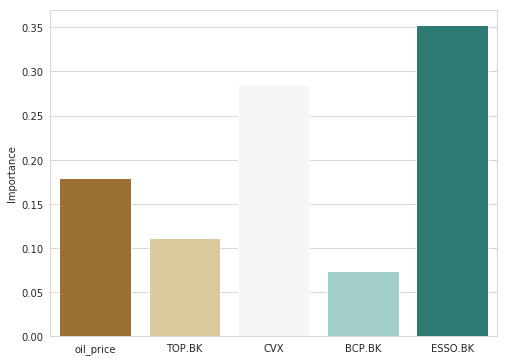

In [457]:
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")